In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn import metrics
url = "http://bit.ly/w-data"
df1 = pd.read_csv(url)
print("Data imported successfully")
df1

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df1.shape

(25, 2)

In [6]:
df1.columns
df1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


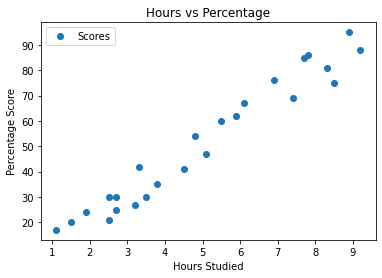

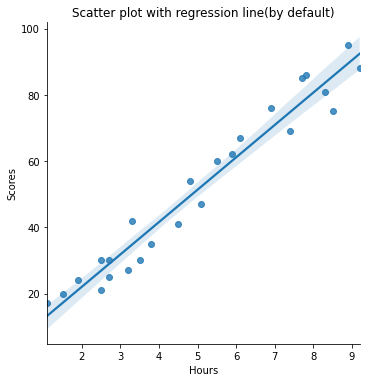

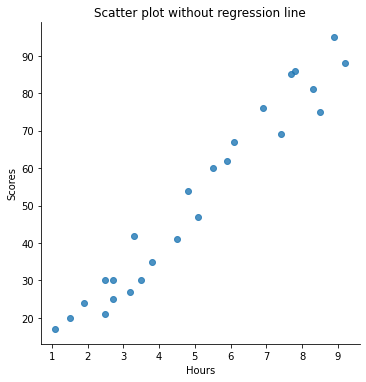

In [7]:
df1.groupby(['Hours'])['Scores'].mean()
df1.plot(x='Hours', y='Scores', style='o')#plots one specific column against another specific column
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
df1.corr()

sns.lmplot(x="Hours",y="Scores", data=df1)
plt.title("Scatter plot with regression line(by default)")
sns.lmplot(x="Hours",y="Scores", fit_reg = False, data=df1)
plt.title("Scatter plot without regression line")
X = df1.iloc[:, :-1].values # All rows and last column 
y = df1.iloc[:, 1].values  # All rows and 2nd column

In [9]:
print(X)
type(X)
print(y)
type(y)

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Training complete.
2.018160041434662
[9.91065648]


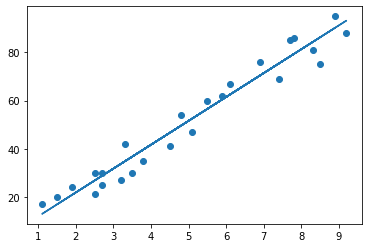

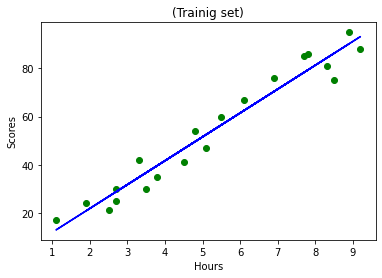

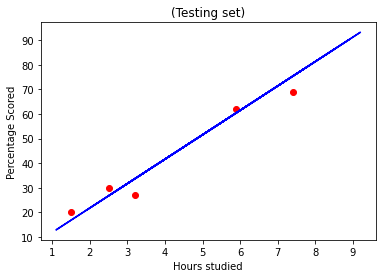

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
No of Hours = [[9.25]]
Predicted Score = 93.69173248737539
Train :  95.15510725211553
Test :  94.54906892105353
Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

print("Training complete.")
print(regressor.intercept_)
print(regressor.coef_)
line = regressor.coef_*X+regressor.intercept_  #y = mx + b 

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()
plt.scatter(X_train,y_train, color='green')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Testing set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2
#What will be predicted score if a student studies for 9.25 hrs/ day?
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))
print("Train : ",regressor.score(X_train,y_train)*100)
print("Test : ",regressor.score(X_test,y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))